# Yelp Sentiment Mining using RNN (LSTM)

## Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df_standard = pd.read_csv("./data/train.csv", encoding="ISO-8859-1")
df_standard.head(5)

,restaurant_id,date,review_id,stars,text,Sentiment
0,tr1,3/13/2014,revtrain1,2,Very disappointed in the customer service. We ...,negative
1,tr2,7/15/2010,revtrain2,2,I really wasn't thrilled with our meal here. T...,negative
2,tr2,12/20/2010,revtrain3,1,STAY AWAY...\n\nWe've been 3 times over the pa...,negative
3,tr2,5/26/2011,revtrain4,2,The food is good and the portions are large. ...,negative
4,tr2,6/22/2011,revtrain5,2,I feel bad about giving this place such a meh ...,negative


In [2]:
df_standard["review"] = df_standard["text"]
df_standard["sentiment"] = df_standard["Sentiment"].apply(lambda x: -1 if x == "negative" else 1)
df_standard = df_standard[["review", "sentiment"]]
df_standard.head(5)

,review,sentiment
0,Very disappointed in the customer service. We ...,-1
1,I really wasn't thrilled with our meal here. T...,-1
2,STAY AWAY...\n\nWe've been 3 times over the pa...,-1
3,The food is good and the portions are large. ...,-1
4,I feel bad about giving this place such a meh ...,-1


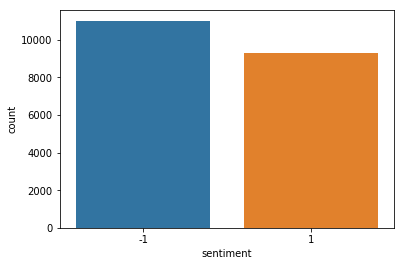

In [3]:
sns.countplot(x="sentiment", data=df_standard)

In [4]:
df_standard.groupby("sentiment").count()

,review
sentiment,
-1,11011
1,9318


In [5]:
df_train_scrapped = pd.read_csv("./data/df_reviews_train.csv")
df_train_scrapped.head(5)

,rating,review,sentiment
0,5,In my younger days when lunch choices consiste...,1
1,3,"After going through yelp and tripadvisor, I wa...",-1
2,5,Ordered Sichuan Prawns and Singapore Rice Nood...,1
3,3,Wong Kei is one of the many options you'll fin...,-1
4,1,One of the worst experience in a restaurant in...,-1


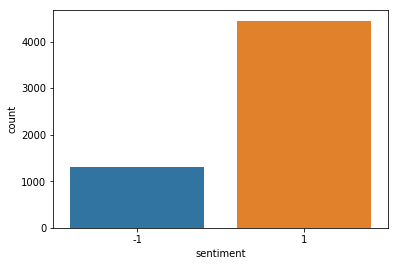

In [6]:
sns.countplot(x="sentiment", data=df_train_scrapped)

In [7]:
df_train_scrapped[["review", "sentiment"]].groupby("sentiment").count()

,review
sentiment,
-1,1297
1,4448


In [8]:
df_train = df_train_scrapped[["review", "sentiment"]]
df_train = pd.concat([df_train, df_standard], axis=0)
df_train.head(5)
df_train.to_csv("./data/df_slim_train_merged.csv", index=False)

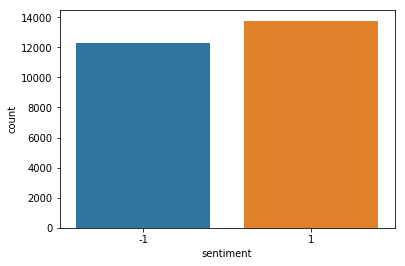

In [9]:
sns.countplot(x="sentiment", data=df_train)

In [10]:
df_train[["review", "sentiment"]].groupby("sentiment").count()

,review
sentiment,
-1,12308
1,13766


In [11]:
df_test = pd.read_csv("./data/df_reviews_test.csv")[["review", "sentiment"]]
df_test.to_csv("./data/df_slim_test.csv", index=False)
df_test.head(5)

,review,sentiment
0,Let's be real here...London...and noodles?? Ye...,1
1,Who goes to London and has Chinese food? Me of...,1
2,My family and I visited London for a few days ...,1
3,This place is so unassuming and very easy to p...,1
4,It's a small and cramped little hole in the wa...,-1


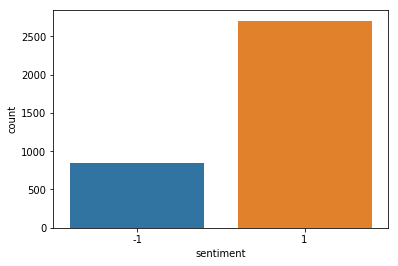

In [12]:
sns.countplot(x="sentiment", data=df_test)

In [13]:
df_test.groupby("sentiment").count()

,review
sentiment,
-1,848
1,2703


In [14]:
df_test_indian = pd.read_csv("./data/df_test_indian.csv")[["review", "sentiment"]]
df_test_indian.head(5)
df_test_indian.to_csv("./data/df_slim_test_indian.csv", index=False)

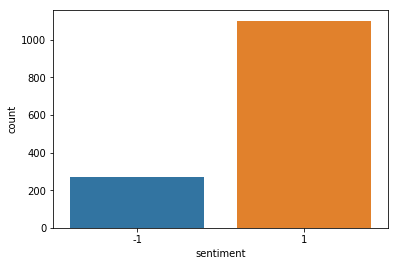

In [15]:
sns.countplot(x="sentiment", data=df_test_indian)

In [16]:
df_test_indian.groupby("sentiment").count()

,review
sentiment,
-1,268
1,1101


In [17]:
df_test_chinese = pd.read_csv("./data/df_test_chinese.csv")[["review", "sentiment"]]
df_test_chinese.head(5)
df_test_chinese.to_csv("./data/df_slim_test_chinese.csv", index=False)

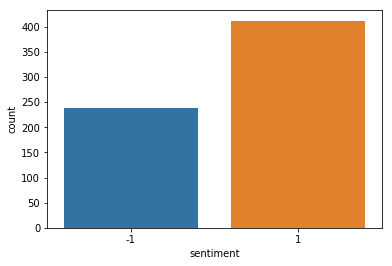

In [18]:
sns.countplot(x="sentiment", data=df_test_chinese)

In [19]:
df_test_chinese.groupby("sentiment").count()

,review
sentiment,
-1,238
1,412


In [20]:
df_test_japanese = pd.read_csv("./data/df_test_japanese.csv")[["review", "sentiment"]]
df_test_japanese.head(5)
df_test_japanese.to_csv("./data/df_slim_test_japanese.csv", index=False)

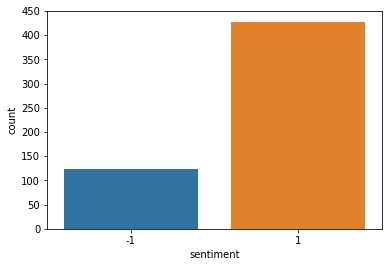

In [21]:
sns.countplot(x="sentiment", data=df_test_japanese)

In [22]:
df_test_japanese.groupby("sentiment").count()

,review
sentiment,
-1,124
1,428


In [23]:
df_test_french = pd.read_csv("./data/df_test_french.csv")[["review", "sentiment"]]
df_test_french.head(5)
df_test_french.to_csv("./data/df_slim_test_french.csv", index=False)

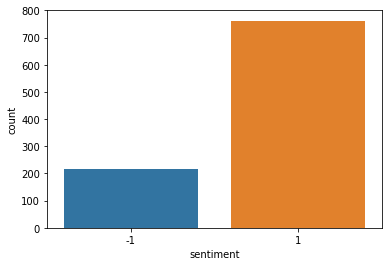

In [24]:
sns.countplot(x="sentiment", data=df_test_french)

In [25]:
df_test_french.groupby("sentiment").count()

,review
sentiment,
-1,218
1,762


## Preparing Data

The same as before, we'll set the seed, define the Fields and get the train/valid/test splits.

In [26]:
import torch
from torchtext import data

SEED = 1234

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(is_target=True, dtype=torch.float)

train_merged_data = data.TabularDataset(
    path='./data/df_slim_train_merged.csv', format='csv',
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

test_data = data.TabularDataset(
    path='./data/df_slim_test.csv', format='csv', 
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

test_indian_data = data.TabularDataset(
    path='./data/df_slim_test_indian.csv', format='csv', 
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

test_chinese_data = data.TabularDataset(
    path='./data/df_slim_test_chinese.csv', format='csv', 
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

test_japanese_data = data.TabularDataset(
    path='./data/df_slim_test_japanese.csv', format='csv', 
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

test_french_data = data.TabularDataset(
    path='./data/df_slim_test_french.csv', format='csv', 
    skip_header=True,
    fields=[
        ('text', TEXT), 
        ('label', LABEL)
    ]
)

In [27]:
import random

train_data, valid_data = train_merged_data.split(split_ratio=0.8, stratified=True, strata_field='label', random_state=random.seed(SEED))

We can see how many examples are in each split by checking their length.

In [28]:
print('len(train_merged_data):', len(train_merged_data))
print('len(train_data):', len(train_data))
print('len(valid_data):', len(valid_data))
print('len(test_data):', len(test_data))
print('len(test_indian_data):', len(test_indian_data))
print('len(test_chinese_data):', len(test_chinese_data))
print('len(test_japanese_data):', len(test_japanese_data))
print('len(test_french_data):', len(test_french_data))

len(train_merged_data): 26074
len(train_data): 20859
len(valid_data): 5215
len(test_data): 3551
len(test_indian_data): 1369
len(test_chinese_data): 650
len(test_japanese_data): 552
len(test_french_data): 980


We can check the fields of the data, hoping that it they match the Fields given earlier.

In [29]:
print('train_data.fields:', train_data.fields)

train_data.fields: {'text': <torchtext.data.field.Field object at 0x7fb8b047b0f0>, 'label': <torchtext.data.field.LabelField object at 0x7fb8b047b160>}


We can also check an example.

In [30]:
print('vars(train_data[0]):', vars(train_data[0]))

vars(train_data[0]): {'text': ['What', 'Groceria', 'Italiana', 'does', 'best', 'is', 'prepare', 'Italian', 'dishes', 'such', 'as', 'lasagna', ',', 'ravioli', ',', 'and', 'pasta', 'for', 'customers', 'to', 'reheat', 'at', 'home', '.', 'I', 'bought', 'some', 'meat', ',', 'cheese', '&', 'spinach', 'ravilois', 'to', 'heat', 'up', 'at', 'home', '.', 'Your', 'instructed', 'to', 'bake', 'them', 'for', '45', 'minutes', 'at', '350', 'deg', 'F', 'on', 'a', 'layer', 'of', 'pasta', 'sauce', ';', 'if', 'you', 'follow', 'these', 'instructions', ',', 'then', 'they', 'will', 'come', 'out', 'great', '.', '\n\n\n\n', 'I', 'also', 'picked', 'up', 'a', 'bag', 'of', '12', 'perogies', 'for', '$', '4', 'which', 'are', 'the', 'best', 'I', 'have', 'found', 'at', 'that', 'price', 'in', 'Pittsburgh', '.', '\n\n\n\n', 'My', 'favorite', 'part', 'is', 'the', 'deli', 'counter', 'where', 'you', 'can', 'pick', 'up', 'both', 'American', 'and', 'Italian', 'specialty', 'deli', 'meats', 'such', 'as', 'capicolla', ',', 'pr

The first update, is the addition of pre-trained word embeddings. These vectors have been trained on corpuses of billions of tokens. Now, instead of having our word embeddings initialized randomly, they are initialized with these pre-trained vectors, where words that appear in similar contexts appear nearby in this vector space.
The first step to using these is to specify the vectors and download them, which is passed as an argument to build_vocab. The glove is the algorithm used to calculate the vectors, go here for more. 6B indicates these vectors were trained on 6 billion tokens. 100d indicates these vectors are 100-dimensional.
Note: these vectors are about 862MB, so watch out if you have a limited internet connection.

In [31]:
TEXT.build_vocab(train_data, max_size=50000, vectors="glove.6B.100d")
LABEL.build_vocab(train_data)

As before, we create the iterators.

In [32]:
BATCH_SIZE = 64

train_merged_iterator, train_iterator, valid_iterator, test_iterator, test_indian_iterator, \
test_chinese_iterator, test_japanese_iterator, test_french_iterator = data.BucketIterator.splits(
    (train_merged_data, train_data, valid_data, test_data, test_indian_data, 
     test_chinese_data, test_japanese_data, test_french_data), 
    batch_size=BATCH_SIZE, 
    sort_key=lambda x: len(x.text), 
    repeat=False)

## Build the Model


### Different RNN Architecture

We use a different RNN architecture called a Long Short-Term Memory (LSTM). Why is an LSTM better than a standard RNN? The hidden state can be thought of as a "memory" of the words seen by the model. It is difficult to train a standard RNN as the gradient decays exponentially along the sequence, causing the RNN to "forget" what has happened earlier in the sequence. LSTMs have an extra recurrent state called a cell, which can be thought of as the "memory" of the LSTM and can remember information for many time steps. LSTMs also use multiple gates, these control the flow of information into and out of the memory. For more information, go [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

### Bidirectional RNN

The concept behind a bidirectional RNN is simple. As well as having an RNN processing the words in the sentence from the first to the last, we have a second RNN processing the words in the sentence from **the last to the first**. PyTorch simplifies this by concatenating both the forward and backward RNNs together, and thus the returned final hidden state, hidden, is the concatenation of the hidden state from the last word of the sentence from the forward RNN with the hidden state of the first word of the sentence from the backward RNN, both of which are the final hidden states from their respective RNNs.

![](https://camo.githubusercontent.com/9f462fe904900e9fc30a10101df3884fec700f60/68747470733a2f2f692e696d6775722e636f6d2f69746d494967782e706e67)

### Multi-layer RNN

Multi-layer RNNs (also called deep RNNs) are another simple concept. The idea is that we add additional RNNs on top of the initial standard RNN, where each RNN added is another layer. The hidden state output by the first (bottom) RNN at time-step $t$ will be the input to the RNN above it at time step $t$. The prediction is then usually made from the final hidden state of the final (highest) layer. These are easily combined with bi-directional RNNs, where each extra layer adds an additional forward and backward RNN.

![](https://camo.githubusercontent.com/0b711a2cae89c6b6bc3cc9e57a95d4f047d2116f/68747470733a2f2f692e696d6775722e636f6d2f6b6e73497a65682e706e67)

### Regularization

Without going into overfitting into to much detail, the more parameters you have in in your model, the higher the probability that you'll overfit (have a low train error but high validation/test error). To combat this, we use regularization. More specifically, we use a method of regularization called dropout. Dropout works by randomly dropping out (setting to 0) neurons during a forward pass. The probability that each neuron is dropped out is set by a hyperparameter and each neuron with dropout applied is considered indepenently. One theory about why dropout works is that a model with parameters dropped out can be seen as a "weaker" (less parameters) model, the predictions from all these "weaker" models (one for each forward pass) get averaged together in the parameters of the model. Thus, your one model can be thought of as an ensemble of weaker models, none of which are over-parameterized and thus should not overfit.

### Implementation Details

We use nn.LSTM on line 8. Also note on line 20 the LSTM returns the output and a tuple of the final hidden state and the final cell state, whereas the standard RNN only returned the output and final hidden state.

As the final hidden state of our LSTM has both a forward and a backward component, which are concatenated together, the size of the input to the nn.Linear layer is twice that of the hidden dimension size.

Implementing bidirectionality and adding additional layers are done by passing values for the num_layers and bidirectional arguments for the RNN/LSTM.

Dropout is implemented by initializing an nn.Dropout layer (the argument is the probability of dropout for each neuron) and using it within the forward method after each layer we want to apply dropout to. Note: never use dropout on the input or output layers (x or fc in this case), you only ever want to use dropout on intermediate layers. The LSTM has a dropout argument which adds dropout on the connections between hidden states in one layer to hidden states in the next layer.

In [33]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(x))
        
        #embedded = [sent len, batch size, emb dim]
        
        output, (hidden, cell) = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim * num directions]
        #hidden = [num layers * num directions, batch size, hid. dim]
        #cell = [num layers * num directions, batch size, hid. dim]
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
                
        #hidden [batch size, hid. dim * num directions]
            
        return self.fc(hidden.squeeze(0))

Like before, we'll create an instance of our RNN class, with the new parameters and arguments for the number of layers, bidirectionality and dropout probability.
To ensure the pre-trained vectors can be loaded into the model, the EMBEDDING_DIM must be equal to that of the pre-trained GloVe vectors loaded earlier.

In [34]:
INPUT_DIM = len(TEXT.vocab)
print("Input dimension:", INPUT_DIM)

EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
print(model)

Input dimension: 49650
RNN(
  (embedding): Embedding(49650, 100)
  (rnn): LSTM(100, 256, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.5)
)


The final addition is copying the pre-trained word embeddings we loaded earlier into the embedding layer of our model.

We retrieve the embeddings from the field's vocab, and ensure they're the correct size, **[vocab size, embedding dim]**

In [35]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([49650, 100])


We then replace the initial weights of the embedding layer with the pre-trained embeddings.

In [36]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

## Train the Model

Now to training the model.

The only change we'll make here is changing the optimizer from `SGD` to `Adam`. SGD updates all parameters with the same learning rate and choosing this learning rate can be tricky. Adam adapts the learning rate for each parameter, giving parameters that are updated more frequently lower learning rates and parameters that are updated infrequently higher learning rates. More information about Adam (and other optimizers) can be found [here](http://ruder.io/optimizing-gradient-descent/index.html).

To change `SGD` to `Adam`, we simply change `optim.SGD` to `optim.Adam,` also note how we do not have to provide an initial learning rate for Adam as PyTorch specifies a sensibile initial learning rate.

In [37]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

The rest of the steps for training the model are unchanged.

We define the criterion and place the model and criterion on the GPU (if available)...

In [38]:
criterion = nn.BCEWithLogitsLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

We implement the function to calculate accuracy...

In [39]:
import torch

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum()/len(correct)
    return acc

We define a function for training our model...

**Note:** as we are now using dropout, we must remember to use `model.train()` to ensure the dropout is "turned on" while training.

In [40]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text.to(device)).squeeze(1)
        
        loss = criterion(predictions, batch.label.to(device))
        
        acc = binary_accuracy(predictions, batch.label.to(device))
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

We define a function for testing our model...

**Note:** as we are now using dropout, we must remember to use `model.eval()` to ensure the dropout is "turned off" while evaluating.

In [41]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text.to(device)).squeeze(1)
            
            loss = criterion(predictions, batch.label.to(device))
            
            acc = binary_accuracy(predictions, batch.label.to(device))

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Finally, we train our model...

In [42]:
N_EPOCHS = 10

for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:.3f}, Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01, Train Loss: 0.546, Train Acc: 72.93%, Val. Loss: 0.614, Val. Acc: 65.67%
Epoch: 02, Train Loss: 0.408, Train Acc: 81.71%, Val. Loss: 0.536, Val. Acc: 73.73%
Epoch: 03, Train Loss: 0.303, Train Acc: 87.72%, Val. Loss: 0.392, Val. Acc: 84.27%
Epoch: 04, Train Loss: 0.228, Train Acc: 91.15%, Val. Loss: 0.318, Val. Acc: 86.29%
Epoch: 05, Train Loss: 0.182, Train Acc: 93.25%, Val. Loss: 0.294, Val. Acc: 88.14%
Epoch: 06, Train Loss: 0.141, Train Acc: 94.92%, Val. Loss: 0.375, Val. Acc: 85.51%
Epoch: 07, Train Loss: 0.115, Train Acc: 95.82%, Val. Loss: 0.461, Val. Acc: 82.86%
Epoch: 08, Train Loss: 0.093, Train Acc: 96.55%, Val. Loss: 0.641, Val. Acc: 78.69%
Epoch: 09, Train Loss: 0.079, Train Acc: 97.16%, Val. Loss: 0.622, Val. Acc: 81.87%
Epoch: 10, Train Loss: 0.066, Train Acc: 97.72%, Val. Loss: 0.623, Val. Acc: 82.20%


We can finally save our LSTM model for Yelp Sentiment Classification task.

In [43]:
torch.save(model, './models/classifier_lstm.pth')

/home/david/anaconda3/envs/machinelearning/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type RNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## Model Evaluation

Finally, the metric you actually care about, the test loss and accuracy.

In [44]:
import torch

def to_binary(preds):
    """
    Convert predicted torch array to either 0 or 1
    """

    #round predictions to the closest integer
    return torch.round(torch.sigmoid(preds))

def predict(model, iterator):
    
    model.eval()
    
    all_predictions = []
    all_actuals = []
    with torch.no_grad():
        for batch in iterator:
            predictions = to_binary(model(batch.text.to(device)).squeeze(1)).tolist()
            all_actuals += batch.label.tolist()
            all_predictions += predictions
            
    return all_predictions, all_actuals

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


def print_confusion_matrix(confusion_matrix, class_names, figsize = (3.5,3), fontsize=15):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

### Sentiment Prediction score on train dataset

In [65]:
train_loss, train_acc = evaluate(model, train_iterator, criterion)

print(f'Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%')

Train Loss: 0.034, Train Acc: 98.89%


Figure(252x216)


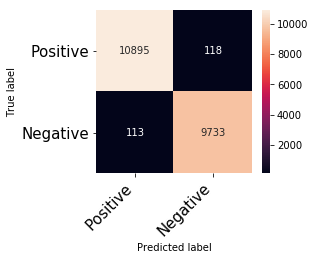

In [69]:
train_predicted_labels, train_actual_labels = predict(model, train_iterator)

classes = ["Positive", "Negative"]
        
cmTrain = confusion_matrix(train_actual_labels, train_predicted_labels)
print(print_confusion_matrix(cmTrain, class_names=classes))

In [70]:
print(classification_report(train_actual_labels, train_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.99      0.99      0.99     11013
    Negative       0.99      0.99      0.99      9846

   micro avg       0.99      0.99      0.99     20859
   macro avg       0.99      0.99      0.99     20859
weighted avg       0.99      0.99      0.99     20859



In [71]:
df_train_predicted = pd.DataFrame({"actual_sentiment": train_actual_labels, "predicted_sentiment": train_predicted_labels})
df_train_predicted.to_csv("./data/df_train_predicted_lstm.csv")

### Sentiment Prediction score on overall test dataset

In [50]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f}, Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.977, Test Acc: 73.48%


This is the confusion matrix based on predicted and actual test label.

Figure(252x216)


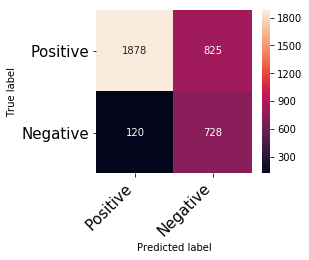

In [51]:
test_predicted_labels, test_actual_labels = predict(model, test_iterator)
cm = confusion_matrix(test_actual_labels, test_predicted_labels)
print(print_confusion_matrix(cm, class_names=classes))

In [52]:
print(classification_report(test_actual_labels, test_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.94      0.69      0.80      2703
    Negative       0.47      0.86      0.61       848

   micro avg       0.73      0.73      0.73      3551
   macro avg       0.70      0.78      0.70      3551
weighted avg       0.83      0.73      0.75      3551



### Sentiment Prediction score on test Indian restaurants dataset

In [53]:
test_indian_loss, test_indian_acc = evaluate(model, test_indian_iterator, criterion)

print(f'Test Indian Loss: {test_indian_loss:.3f}, Test Indian Acc: {test_indian_acc*100:.2f}%')

Test Indian Loss: 0.925, Test Indian Acc: 74.52%


Figure(252x216)


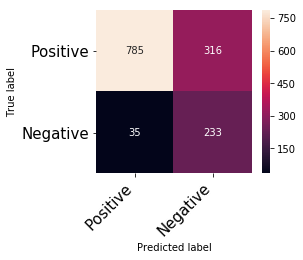

In [54]:
test_indian_predicted_labels, test_indian_actual_labels = predict(model, test_indian_iterator)
cmIN = confusion_matrix(test_indian_actual_labels, test_indian_predicted_labels)
print(print_confusion_matrix(cmIN, class_names=classes))

In [55]:
print(classification_report(test_indian_actual_labels, test_indian_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.96      0.71      0.82      1101
    Negative       0.42      0.87      0.57       268

   micro avg       0.74      0.74      0.74      1369
   macro avg       0.69      0.79      0.69      1369
weighted avg       0.85      0.74      0.77      1369



### Sentiment Prediction score on test Chinese restaurants dataset

In [56]:
test_chinese_loss, test_chinese_acc = evaluate(model, test_chinese_iterator, criterion)

print(f'Test Chinese Loss: {test_chinese_loss:.3f}, Test Chinese Acc: {test_chinese_acc*100:.2f}%')

Test Chinese Loss: 1.550, Test Chinese Acc: 61.25%


Figure(252x216)


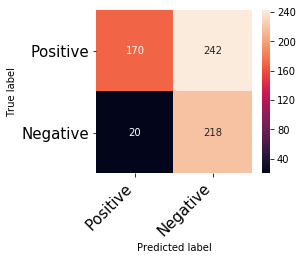

In [57]:
test_chinese_predicted_labels, test_chinese_actual_labels = predict(model, test_chinese_iterator)
cmCN = confusion_matrix(test_chinese_actual_labels, test_chinese_predicted_labels)
print(print_confusion_matrix(cmCN, class_names=classes))

In [58]:
print(classification_report(test_chinese_actual_labels, test_chinese_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.89      0.41      0.56       412
    Negative       0.47      0.92      0.62       238

   micro avg       0.60      0.60      0.60       650
   macro avg       0.68      0.66      0.59       650
weighted avg       0.74      0.60      0.59       650



### Sentiment Prediction score on test Japanese restaurants dataset

In [59]:
test_japanese_loss, test_japanese_acc = evaluate(model, test_japanese_iterator, criterion)

print(f'Test Japanese Loss: {test_japanese_loss:.3f}, Test Japanese Acc: {test_japanese_acc*100:.2f}%')

Test Japanese Loss: 1.381, Test Japanese Acc: 64.62%


Figure(252x216)


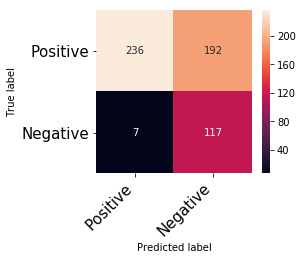

In [60]:
test_japanese_predicted_labels, test_japanese_actual_labels = predict(model, test_japanese_iterator)
cmJP = confusion_matrix(test_japanese_actual_labels, test_japanese_predicted_labels)
print(print_confusion_matrix(cmJP, class_names=classes))

In [61]:
print(classification_report(test_japanese_actual_labels, test_japanese_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.97      0.55      0.70       428
    Negative       0.38      0.94      0.54       124

   micro avg       0.64      0.64      0.64       552
   macro avg       0.67      0.75      0.62       552
weighted avg       0.84      0.64      0.67       552



### Sentiment Prediction score on test French restaurants dataset

In [62]:
test_french_loss, test_french_acc = evaluate(model, test_french_iterator, criterion)

print(f'Test French Loss: {test_french_loss:.3f}, Test French Acc: {test_french_acc*100:.2f}%')

Test French Loss: 0.979, Test French Acc: 73.48%


Figure(252x216)


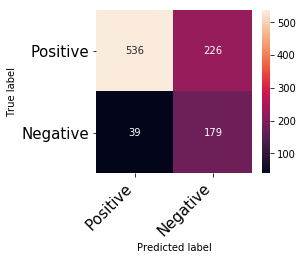

In [63]:
test_french_predicted_labels, test_french_actual_labels = predict(model, test_french_iterator)
cmFR = confusion_matrix(test_french_actual_labels, test_french_predicted_labels)
print(print_confusion_matrix(cmFR, class_names=classes))

In [64]:
print(classification_report(test_french_actual_labels, test_french_predicted_labels, target_names=classes))

              precision    recall  f1-score   support

    Positive       0.93      0.70      0.80       762
    Negative       0.44      0.82      0.57       218

   micro avg       0.73      0.73      0.73       980
   macro avg       0.69      0.76      0.69       980
weighted avg       0.82      0.73      0.75       980



# Conclusion

We have tried to classify the sentiment for each restaurant categories using LSTM. 

These are the accuracy score of test restaurants dataset using LSTM, SVM, Naive Bayes classifier:
```
            |      |   negation   |
            | LSTM | SVM  | Bayes |
    Chinese | 0.61 | 0.83 |  0.80 |
   Japanese | 0.64 | 0.87 |  0.86 |
     Indian | 0.74 | 0.90 |  0.87 |
     French | 0.73 | 0.86 |  0.88 |
```

And these are weighted avg f1-score of test restaurants dataset using LSTM, SVM, Naive Bayes classifier:
```
            |      |   negation   |
            | LSTM |  SVM | Bayes |
    Chinese | 0.59 | 0.84 |  0.81 |
   Japanese | 0.67 | 0.87 |  0.86 |
     Indian | 0.77 | 0.90 |  0.89 |
     French | 0.75 | 0.87 |  0.89 |
```

These results show that LSTM with Glove embedding perform poorer than SVM and Naive Bayes which are processing with word negation features. 


# Possible Improvement

We could explore further by using other embedding model like Google Universal Sentence Encoder, Word2Vec, or using other algorithm like Doc2Vec in order to improve the performance of this classifier.